## Now i am ready to test the model with my food photos

### Imports

In [12]:
import tensorflow as tf
import os
import json
from helper_functions import load_and_prep_image
import matplotlib.pyplot as plt

### Load the model

In [13]:
model = tf.keras.models.load_model("food_vision_model.h5")

### Get the photos filepaths

In [14]:
my_food_images = ["my_images/" + img_path for img_path in os.listdir("my_images")]
my_food_images

['my_images/chicken fillet.jpg',
 'my_images/ice cream.jpg',
 'my_images/mushroom risotto.jpg',
 'my_images/pizza.jpg',
 'my_images/salad.jpg',
 'my_images/tortellini.jpg',
 'my_images/viber_image_2023-10-12_11-38-20-700.jpg',
 'my_images/viber_image_2023-10-12_11-38-22-602.jpg',
 'my_images/viber_image_2023-10-12_11-38-23-992.jpg',
 'my_images/viber_image_2023-10-12_11-38-24-617.jpg',
 'my_images/viber_image_2023-10-12_11-38-24-917.jpg',
 'my_images/viber_image_2023-10-12_11-38-25-370.jpg',
 'my_images/viber_image_2023-10-12_11-38-26-292.jpg',
 'my_images/viber_image_2023-10-12_11-38-26-923.jpg',
 'my_images/viber_image_2023-10-12_11-38-28-235.jpg',
 'my_images/viber_image_2023-10-12_11-38-28-660.jpg',
 'my_images/viber_image_2023-10-12_11-38-29-285.jpg',
 'my_images/viber_image_2023-10-12_11-38-29-634.jpg',
 'my_images/viber_image_2023-10-12_11-38-31-086.jpg',
 'my_images/viber_image_2023-10-12_11-38-31-739.jpg',
 'my_images/viber_image_2023-10-12_11-38-32-197.jpg',
 'my_images/viber

### Get the names of the classes in a list

In [15]:
# Load the list from the JSON file
with open("class_names.json", "r") as file:
    class_names = json.load(file)

# print the class_names list
print(len(class_names))

101


### Make the predictions

1/1 [==============================] - 0s 290ms/step


C:\Users\mkats\AppData\Local\Temp\ipykernel_6048\1925383390.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


1/1 [==============================] - 0s 291ms/step


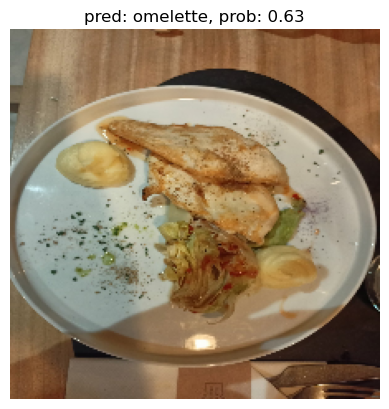

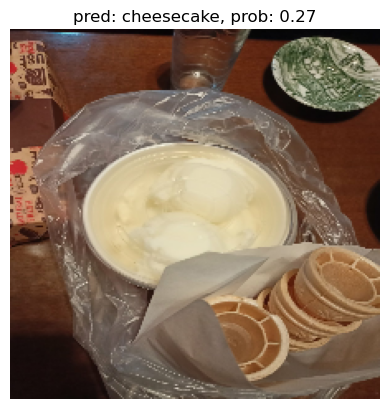

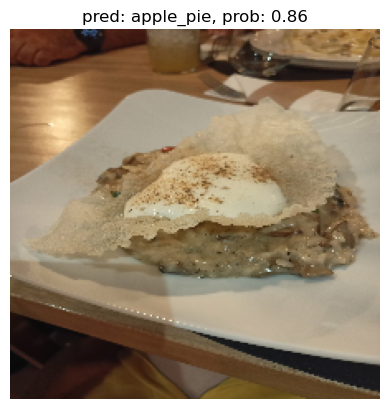

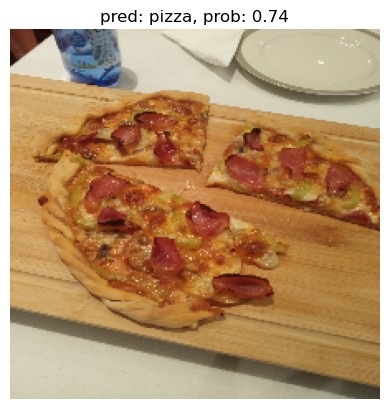

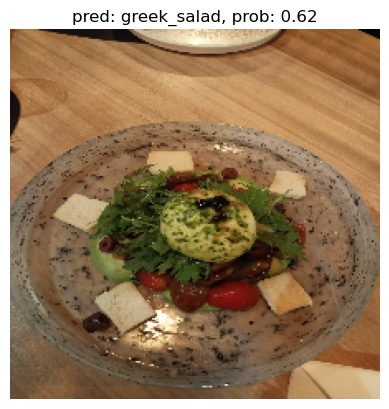

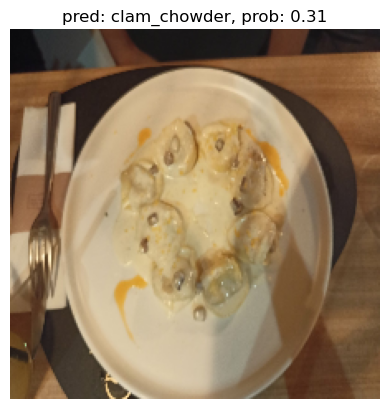

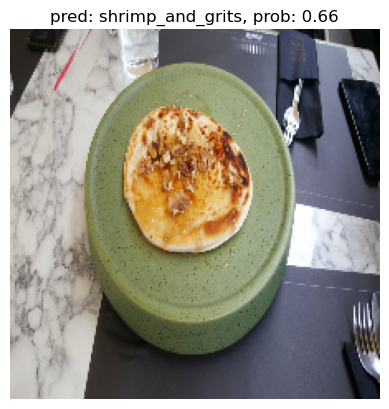

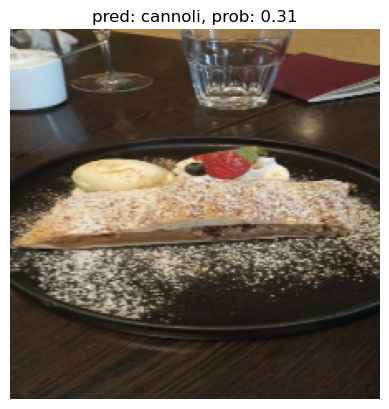

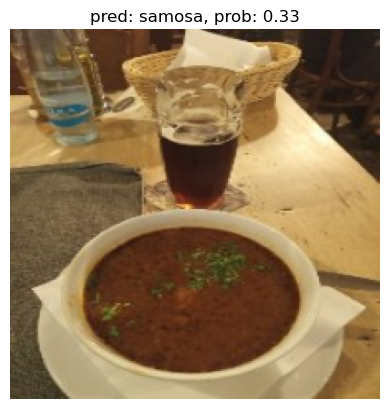

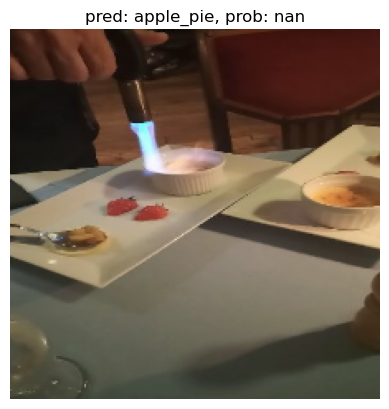

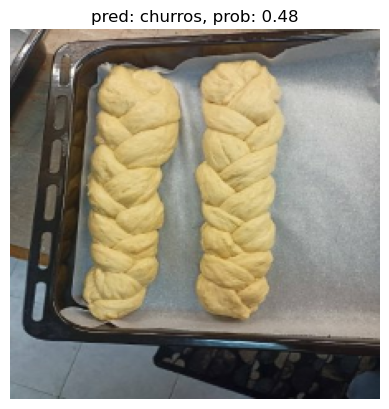

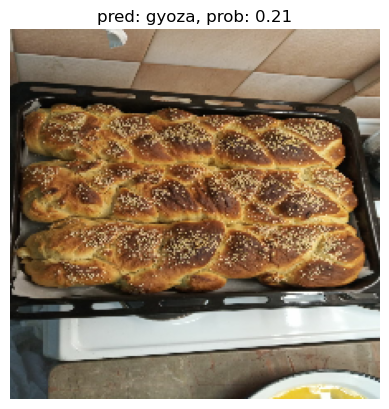

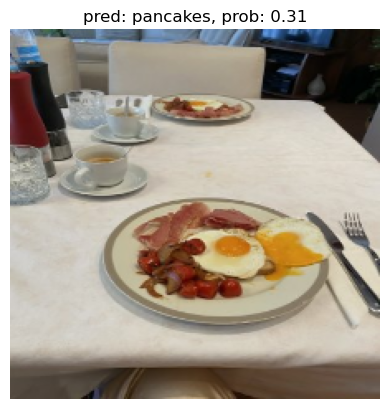

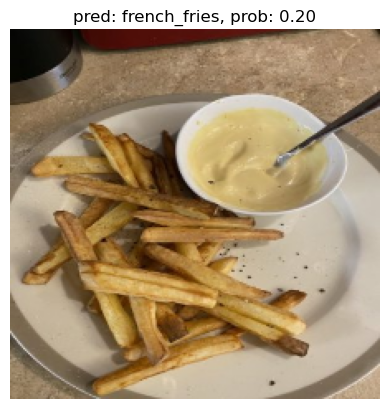

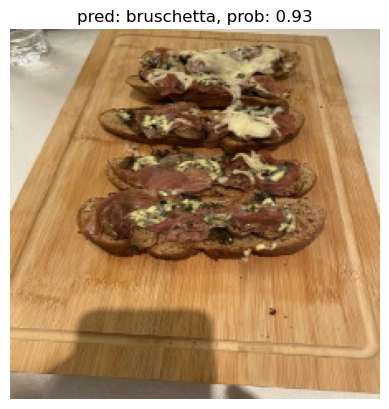

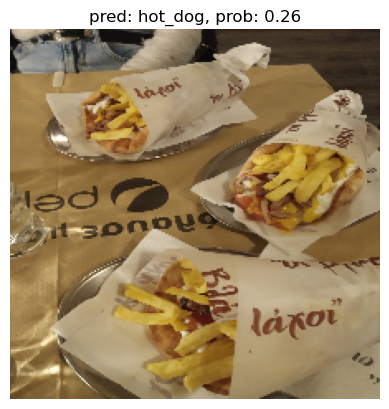

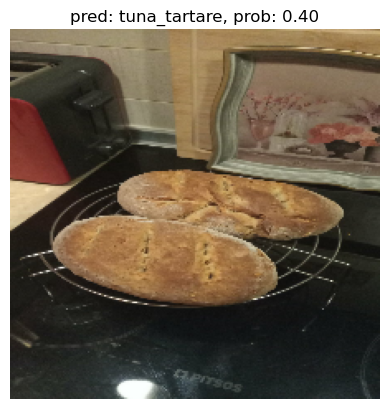

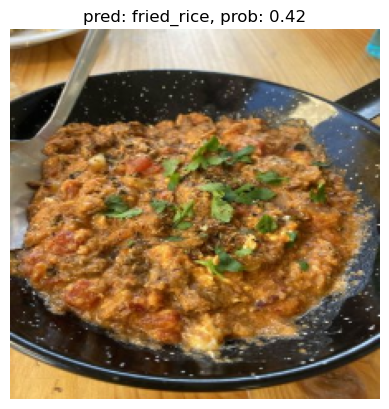

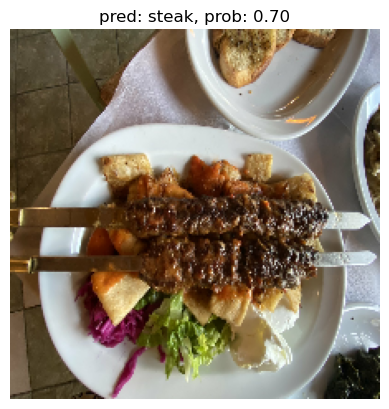

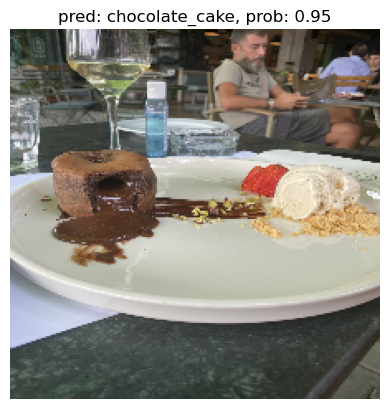

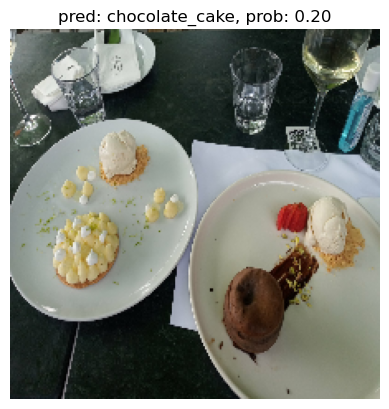

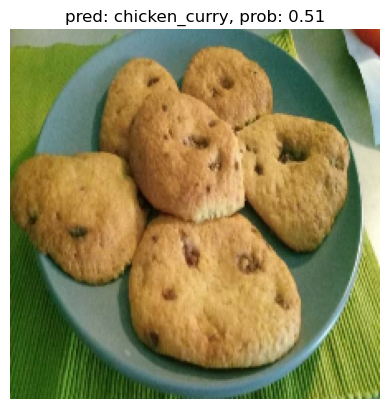

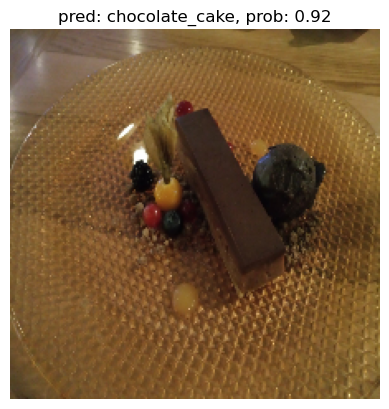

In [16]:
for img in my_food_images:
    img = load_and_prep_image(img, scale=False)  # Load in target image and turn it to tensor
    pred_prop = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
    pred_class = class_names[pred_prop.argmax()] # find the predicted class label
    # Plot the images with appropriate annotations
    plt.figure()
    plt.imshow(img/255.)  # imshow() requires float inputs to be normalized
    plt.title(f"pred: {pred_class}, prob: {pred_prop.max():.2f}")
    plt.axis(False)